# DATA

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc 
import seaborn as sns
import time

In [102]:
rc('font', family='HCR Dotum')

In [103]:
df = pd.read_csv('상권변화지표.csv', thousands=',', encoding='euc-kr').drop(['Unnamed: 0'], axis=1)
df

,년도,분기,행정구역,개업률,폐업률,신생 1 생존률,신생 3 생존률,신생 5 생존률,1 생존률,3 생존률,5 생존률,주거 인구,직장 인구,임대료,전체 점포수,프랜차이즈 점포수,일반 점포수,최근 10년 평균영업기간,최근 30년 평균영업기간,상권변화지표
0,2016,3,종로구,3.9,4.3,74.7,46.8,30.2,73.7,45.5,31.3,62,125,142788,7088,958,6130,3.1,5.1,정체
1,2016,3,중구,3.5,3.9,73.0,47.4,37.3,78.4,52.3,37.4,110,517,188434,6683,1079,5604,3.2,5.3,정체
2,2016,3,용산구,4.6,4.6,74.3,44.3,33.4,72.6,46.7,32.1,97,72,100920,4909,638,4271,3.0,4.7,정체
3,2016,3,성동구,5.2,5.2,67.4,46.8,31.5,74.4,47.1,32.3,150,101,85570,3807,675,3132,3.0,4.7,정체
4,2016,3,광진구,4.4,5.1,71.4,38.4,26.4,71.8,40.9,25.4,197,45,88334,5216,975,4241,3.0,4.5,다이나믹
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2021,2,관악구,5.3,4.7,73.3,42.3,23.5,64.2,36.9,27.4,166,25,108356,6135,1072,5063,2.4,4.4,다이나믹
496,2021,2,서초구,3.6,3.2,76.8,51.0,31.5,70.8,44.9,34.0,89,121,123724,7948,1500,6448,2.8,4.8,정체
497,2021,2,강남구,4.8,3.5,74.2,45.0,27.9,66.5,39.2,30.1,141,293,144055,13772,2561,11211,2.6,4.4,다이나믹
498,2021,2,송파구,4.6,4.0,70.7,44.7,29.3,69.8,42.4,31.7,199,119,154301,8673,1783,6890,2.5,4.4,다이나믹


In [104]:
a = df['상권변화지표']
df['프랜차이즈 점포 비율'] = df['프랜차이즈 점포수'] / df['전체 점포수']
df['직장 인구 대비 주거 인구'] = df['직장 인구'] / df['주거 인구']
df = df.drop(['전체 점포수', '프랜차이즈 점포수', '일반 점포수', '상권변화지표', '직장 인구', '주거 인구'], axis=1)
df['상권변화지표'] = a
df

,년도,분기,행정구역,개업률,폐업률,신생 1 생존률,신생 3 생존률,신생 5 생존률,1 생존률,3 생존률,5 생존률,임대료,최근 10년 평균영업기간,최근 30년 평균영업기간,프랜차이즈 점포 비율,직장 인구 대비 주거 인구,상권변화지표
0,2016,3,종로구,3.9,4.3,74.7,46.8,30.2,73.7,45.5,31.3,142788,3.1,5.1,0.135158,2.016129,정체
1,2016,3,중구,3.5,3.9,73.0,47.4,37.3,78.4,52.3,37.4,188434,3.2,5.3,0.161454,4.700000,정체
2,2016,3,용산구,4.6,4.6,74.3,44.3,33.4,72.6,46.7,32.1,100920,3.0,4.7,0.129965,0.742268,정체
3,2016,3,성동구,5.2,5.2,67.4,46.8,31.5,74.4,47.1,32.3,85570,3.0,4.7,0.177305,0.673333,정체
4,2016,3,광진구,4.4,5.1,71.4,38.4,26.4,71.8,40.9,25.4,88334,3.0,4.5,0.186925,0.228426,다이나믹
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2021,2,관악구,5.3,4.7,73.3,42.3,23.5,64.2,36.9,27.4,108356,2.4,4.4,0.174735,0.150602,다이나믹
496,2021,2,서초구,3.6,3.2,76.8,51.0,31.5,70.8,44.9,34.0,123724,2.8,4.8,0.188727,1.359551,정체
497,2021,2,강남구,4.8,3.5,74.2,45.0,27.9,66.5,39.2,30.1,144055,2.6,4.4,0.185957,2.078014,다이나믹
498,2021,2,송파구,4.6,4.0,70.7,44.7,29.3,69.8,42.4,31.7,154301,2.5,4.4,0.205581,0.597990,다이나믹


In [6]:
df.columns

Index(['년도', '분기', '행정구역', '개업률', '폐업률', '신생 1  생존률', '신생 3  생존률', '신생 5  생존률',
       '1  생존률', '3  생존률', '5  생존률', '임대료', '최근 10년  평균영업기간', '최근 30년  평균영업기간',
       '프랜차이즈 점포 비율', '직장 인구 대비 주거 인구', '상권변화지표'],
      dtype='object')

In [105]:
columns = ['개업률', '폐업률', '신생 1  생존률', '신생 3  생존률', '신생 5  생존률',
       '1  생존률', '3  생존률', '5  생존률', '임대료', '최근 10년  평균영업기간', '최근 30년  평균영업기간',
       '프랜차이즈 점포 비율', '직장 인구 대비 주거 인구']
df1 = pd.DataFrame(df, columns=columns)
df1['target'] = df['상권변화지표']
df1

,개업률,폐업률,신생 1 생존률,신생 3 생존률,신생 5 생존률,1 생존률,3 생존률,5 생존률,임대료,최근 10년 평균영업기간,최근 30년 평균영업기간,프랜차이즈 점포 비율,직장 인구 대비 주거 인구,target
0,3.9,4.3,74.7,46.8,30.2,73.7,45.5,31.3,142788,3.1,5.1,0.135158,2.016129,정체
1,3.5,3.9,73.0,47.4,37.3,78.4,52.3,37.4,188434,3.2,5.3,0.161454,4.700000,정체
2,4.6,4.6,74.3,44.3,33.4,72.6,46.7,32.1,100920,3.0,4.7,0.129965,0.742268,정체
3,5.2,5.2,67.4,46.8,31.5,74.4,47.1,32.3,85570,3.0,4.7,0.177305,0.673333,정체
4,4.4,5.1,71.4,38.4,26.4,71.8,40.9,25.4,88334,3.0,4.5,0.186925,0.228426,다이나믹
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,5.3,4.7,73.3,42.3,23.5,64.2,36.9,27.4,108356,2.4,4.4,0.174735,0.150602,다이나믹
496,3.6,3.2,76.8,51.0,31.5,70.8,44.9,34.0,123724,2.8,4.8,0.188727,1.359551,정체
497,4.8,3.5,74.2,45.0,27.9,66.5,39.2,30.1,144055,2.6,4.4,0.185957,2.078014,다이나믹
498,4.6,4.0,70.7,44.7,29.3,69.8,42.4,31.7,154301,2.5,4.4,0.205581,0.597990,다이나믹


In [106]:
X = df1.iloc[:, :-1]
Y = df1.iloc[:, -1]

# 상관관계

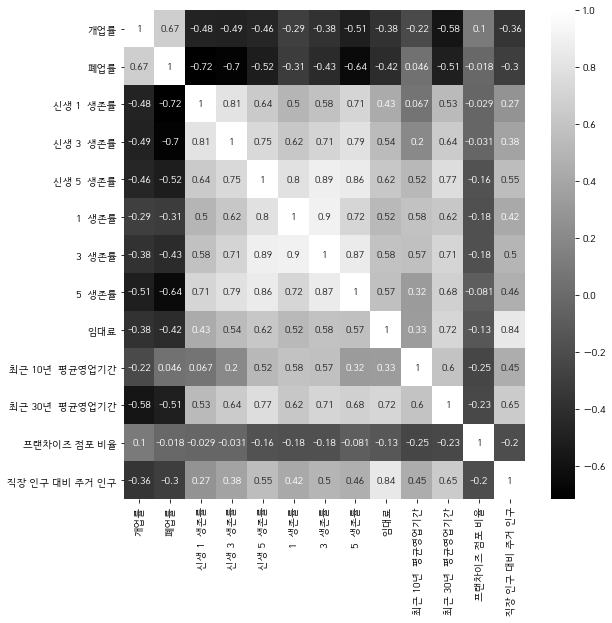

In [107]:
corr = X.corr()
plt.figure(figsize=(9,9))
ax = sns.heatmap(corr, annot=True, cmap='gray')
plt.show()

In [108]:
corr = corr.apply(lambda x: round(x, 2))
s = corr.unstack()
df_corr = pd.DataFrame(s[s < 1].sort_values(ascending=False), columns=['상관계수'])
df_corr.style.background_gradient(cmap='gray')

,,상관계수
3 생존률,1 생존률,0.900000
1 생존률,3 생존률,0.900000
신생 5 생존률,3 생존률,0.890000
3 생존률,신생 5 생존률,0.890000
5 생존률,3 생존률,0.870000
3 생존률,5 생존률,0.870000
5 생존률,신생 5 생존률,0.860000
신생 5 생존률,5 생존률,0.860000
임대료,직장 인구 대비 주거 인구,0.840000
직장 인구 대비 주거 인구,임대료,0.840000


생존률 간의 높은 상관관계

# 변수 선택

In [109]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-0.66823582, -0.08949949,  1.04039609, ...,  2.14731753,
        -1.8220577 ,  1.75526197],
       [-1.18206574, -0.62223452,  0.53904302, ...,  2.90394809,
        -0.69917054,  5.12009732],
       [ 0.23096655,  0.31005179,  0.92243066, ...,  0.63405641,
        -2.0437895 ,  0.15819097],
       ...,
       [ 0.48788151, -1.15496956,  0.89293931, ..., -0.50088943,
         0.34711738,  1.83284891],
       [ 0.23096655, -0.48905076, -0.13925819, ..., -0.50088943,
         1.18506412, -0.02269404],
       [ 0.87325396,  0.04368427,  0.56853438, ..., -0.50088943,
         0.46926059, -0.57041984]])

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

In [111]:
data_train = X_scaled
target_train = Y
data_test = X_scaled
target_test = Y

x_train, x_val, y_train, y_val = train_test_split(data_train, target_train, test_size=0.2)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((400, 13), (100, 13), (400,), (100,))

In [112]:
rf = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
scores = cross_validate(rf, x_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.8724999999999999


In [113]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [114]:
rf.feature_importances_

array([0.04927337, 0.03356351, 0.06162885, 0.04404698, 0.10601316,
       0.0639812 , 0.13025997, 0.05260561, 0.05287178, 0.02670167,
       0.19591468, 0.10504864, 0.07809058])

(-1.0, 13.0)

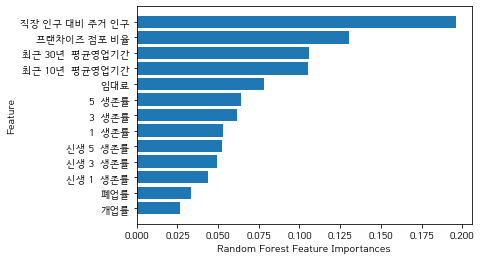

In [115]:
n_features = X.shape[1]
plt.barh(np.arange(n_features), sorted(rf.feature_importances_), align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel('Random Forest Feature Importances')
plt.ylabel('Feature')
plt.ylim(-1, n_features)

생존률 중 5년 생존률 중요도가 가장 높음 > 5년 생존률만 사용

In [116]:
X = X.drop(['신생 1  생존률', '신생 3  생존률', '신생 5  생존률', '1  생존률', '3  생존률'], axis=1)

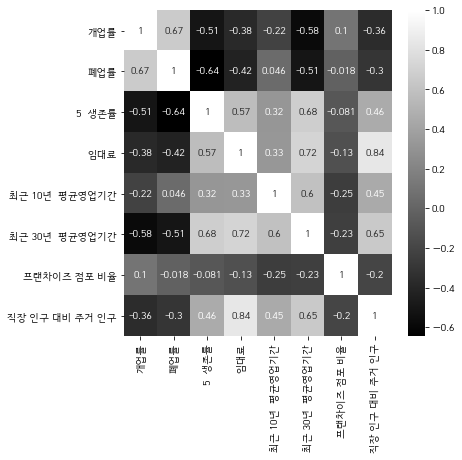

In [117]:
corr = X.corr()
plt.figure(figsize=(6,6))
ax = sns.heatmap(corr, annot=True, cmap='gray')
plt.show()

최근 30년 평균 영업기간 > 전체적으로 높은 상관계수 > 제거

In [118]:
X = X.drop(['최근 30년  평균영업기간'], axis=1)

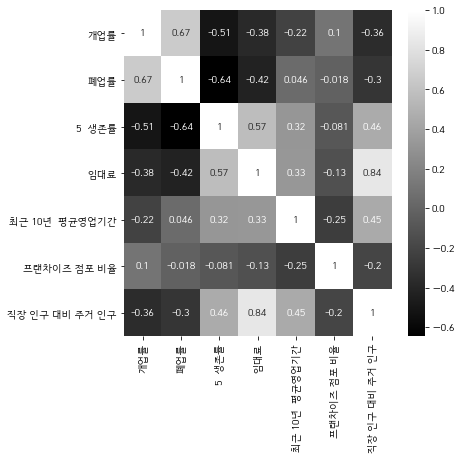

In [119]:
corr = X.corr()
plt.figure(figsize=(6,6))
ax = sns.heatmap(corr, annot=True, cmap='gray')
plt.show()

'임대료', '직장 인구 대비 주거 인구' 높은 상관관계

In [120]:
X_scaled = StandardScaler().fit_transform(X)

data_train = X_scaled[:450]
target_train = Y[:450]
data_test = X_scaled[450:]
target_test = Y[450:]

x_train, x_val, y_train, y_val = train_test_split(data_train, target_train, test_size=0.2)

In [121]:
rf = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
scores = cross_validate(rf, x_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.8305555555555555


In [122]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [123]:
rf.feature_importances_

array([0.12368715, 0.09161071, 0.21308384, 0.11302874, 0.08052005,
       0.17504421, 0.2030253 ])

(-1.0, 7.0)

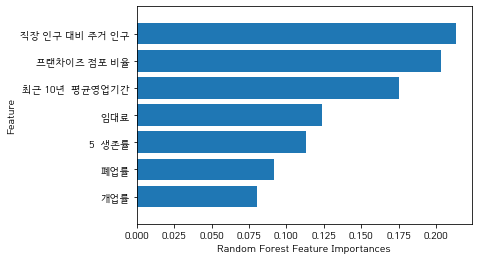

In [124]:
n_features = X.shape[1]
plt.barh(np.arange(n_features), sorted(rf.feature_importances_), align='center')
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel('Random Forest Feature Importances')
plt.ylabel('Feature')
plt.ylim(-1, n_features)

변수 중요도 낮은 '임대료' 제거

In [125]:
X = X.drop(['임대료'], axis=1)

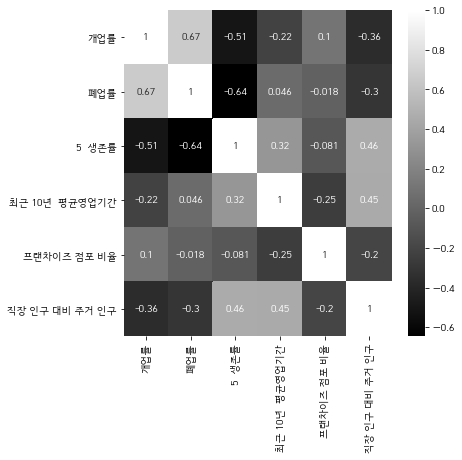

In [126]:
corr = X.corr()
plt.figure(figsize=(6,6))
ax = sns.heatmap(corr, annot=True, cmap='gray')
plt.show()

In [127]:
X.columns

Index(['개업률', '폐업률', '5  생존률', '최근 10년  평균영업기간', '프랜차이즈 점포 비율',
       '직장 인구 대비 주거 인구'],
      dtype='object')

In [128]:
df2 = pd.concat([df.iloc[:,:3], X], axis=1)
df2 = pd.concat([df2, Y], axis=1)
df2.to_csv('상권2.csv', encoding='euc-kr')
df2

,년도,분기,행정구역,개업률,폐업률,5 생존률,최근 10년 평균영업기간,프랜차이즈 점포 비율,직장 인구 대비 주거 인구,target
0,2016,3,종로구,3.9,4.3,31.3,3.1,0.135158,2.016129,정체
1,2016,3,중구,3.5,3.9,37.4,3.2,0.161454,4.700000,정체
2,2016,3,용산구,4.6,4.6,32.1,3.0,0.129965,0.742268,정체
3,2016,3,성동구,5.2,5.2,32.3,3.0,0.177305,0.673333,정체
4,2016,3,광진구,4.4,5.1,25.4,3.0,0.186925,0.228426,다이나믹
...,...,...,...,...,...,...,...,...,...,...
495,2021,2,관악구,5.3,4.7,27.4,2.4,0.174735,0.150602,다이나믹
496,2021,2,서초구,3.6,3.2,34.0,2.8,0.188727,1.359551,정체
497,2021,2,강남구,4.8,3.5,30.1,2.6,0.185957,2.078014,다이나믹
498,2021,2,송파구,4.6,4.0,31.7,2.5,0.205581,0.597990,다이나믹


# 그레디언트 부스팅

In [129]:
X_scaled = StandardScaler().fit_transform(X)

data_train = X_scaled
target_train = Y

x_train, x_val, y_train, y_val = train_test_split(data_train, target_train, test_size=0.2)

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, x_train, y_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.8324999999999999


In [131]:
gb.fit(x_train, y_train)
gb.score(x_val, y_val)

0.94

### 예측

In [132]:
df3 = pd.read_csv('상권 테스트.csv', encoding='euc-kr').drop(['Unnamed: 0'], axis=1)
df3.head()

,년도,분기,행정구역,개업률,폐업률,5 생존률,최근 10년 평균영업기간,프랜차이즈 점포 비율,직장 인구 대비 주거 인구
0,2021,3,종로구,2.96,3.32,38.66,2.90,0.145786,0.145786
1,2021,3,중구,2.66,3.44,37.66,2.91,0.185066,0.185066
2,2021,3,용산구,3.07,3.73,34.61,2.80,0.133155,0.133155
3,2021,3,성동구,5.16,3.54,33.70,2.52,0.175993,0.175993
4,2021,3,광진구,4.05,3.03,33.55,2.59,0.188076,0.188076


In [133]:
X2 = np.array(df3.iloc[:, 3:])
x_test = scaler.transform(X2)

In [134]:
gb.predict(x_test)

array(['정체', '정체', '정체', '정체', '정체', '다이나믹', '다이나믹', '정체', '다이나믹', '정체',
       '다이나믹', '다이나믹', '정체', '정체', '다이나믹', '다이나믹', '정체', '다이나믹', '정체',
       '정체', '다이나믹', '정체', '정체', '정체', '정체', '정체', '정체', '정체', '상권축소',
       '정체', '정체', '다이나믹', '정체', '정체', '다이나믹', '다이나믹', '다이나믹', '정체', '정체',
       '다이나믹', '정체', '정체', '다이나믹', '정체', '정체', '다이나믹', '정체', '다이나믹',
       '다이나믹', '다이나믹'], dtype=object)

In [135]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, x_train, y_train, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

1.0 0.8574999999999999


In [136]:
hgb.fit(x_train, y_train)
hgb.score(x_val, y_val)

0.92

In [137]:
# 예측
hgb.predict(x_test)

array(['정체', '정체', '정체', '정체', '정체', '정체', '다이나믹', '정체', '다이나믹', '정체',
       '다이나믹', '다이나믹', '정체', '정체', '다이나믹', '다이나믹', '다이나믹', '다이나믹', '정체',
       '정체', '다이나믹', '정체', '정체', '다이나믹', '다이나믹', '정체', '정체', '정체', '다이나믹',
       '정체', '정체', '다이나믹', '정체', '다이나믹', '다이나믹', '다이나믹', '다이나믹', '정체',
       '다이나믹', '다이나믹', '다이나믹', '다이나믹', '다이나믹', '다이나믹', '정체', '다이나믹', '정체',
       '다이나믹', '다이나믹', '다이나믹'], dtype=object)